In [ ]:
# default_exp bayesian_logistic_regression

# bayesian_logistic_regression

> API details.

In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import pymc3 as pm
import matplotlib.pyplot as plt
from scipy.optimize import fmin
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')

RANDOM_SEED = 20090425

In [ ]:
# the very low birthweight infants dataset
vlbw = pd.read_csv('data/vlbw.csv', index_col=0).dropna(axis=0, subset=['ivh', 'pneumo'])
ivh = vlbw.ivh.isin(['definite', 'possible']).astype(int).values
pneumo = vlbw.pneumo.values

In [ ]:
print(vlbw.groupby('pneumo').bwt.mean())
bwt_kg = vlbw.bwt.values/1000
bwt_kg.shape

pneumo
0.0    1089.395122
1.0    1035.355140
Name: bwt, dtype: float64


(517,)

Text(0.5, 0, 'Birth weight')

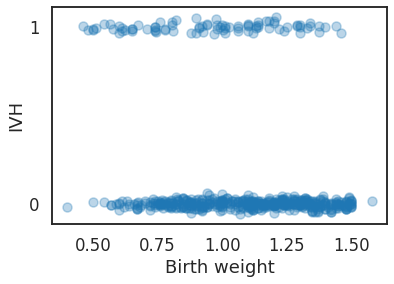

In [ ]:
jitter = np.random.normal(scale=0.02, size=len(vlbw))

plt.scatter(bwt_kg, ivh + jitter, alpha=0.3)
plt.yticks([0,1])
plt.ylabel("IVH")
plt.xlabel("Birth weight")

In [ ]:
sum_of_squares = lambda θ, x, y: np.sum((y - θ[0] - θ[1]*x) ** 2)

betas_vlbw = fmin(sum_of_squares, [1,1], args=(bwt_kg,ivh))

Optimization terminated successfully.
         Current function value: 68.076514
         Iterations: 50
         Function evaluations: 94


In [ ]:
betas_vlbw

array([ 0.48489831, -0.29723764])

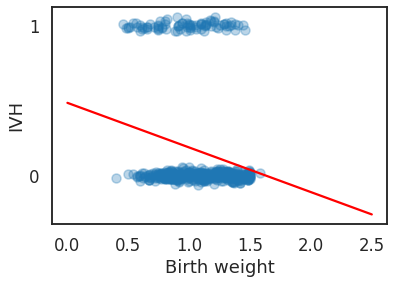

In [ ]:
plt.scatter(bwt_kg, ivh + jitter, alpha=0.3)
plt.yticks([0,1])
plt.ylabel("IVH")
plt.xlabel("Birth weight")
plt.plot([0,2.5], [betas_vlbw[0] + betas_vlbw[1]*0, betas_vlbw[0] + betas_vlbw[1]*2.5], 'r-')

### Stochastic model
$$\text{logit}(p) = \log\left[\frac{p}{1-p}\right] = x$$

In [ ]:
logit = lambda p: np.log(p/(1.-p))

<ipython-input-14-45811b5b99cf>:2: RuntimeWarning: divide by zero encountered in true_divide
  plt.plot(unit_interval/(1-unit_interval), unit_interval)


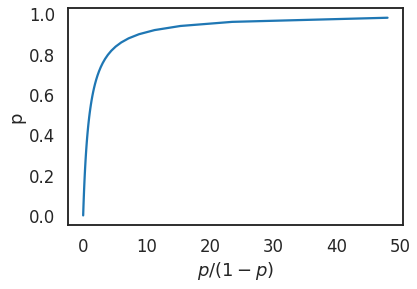

In [ ]:
unit_interval = np.linspace(0,1)
plt.plot(unit_interval/(1-unit_interval), unit_interval)
plt.xlabel(r'$p/(1-p)$')
plt.ylabel('p');

<ipython-input-12-ed27dbbd8681>:1: RuntimeWarning: divide by zero encountered in true_divide
  logit = lambda p: np.log(p/(1.-p))
<ipython-input-12-ed27dbbd8681>:1: RuntimeWarning: divide by zero encountered in log
  logit = lambda p: np.log(p/(1.-p))


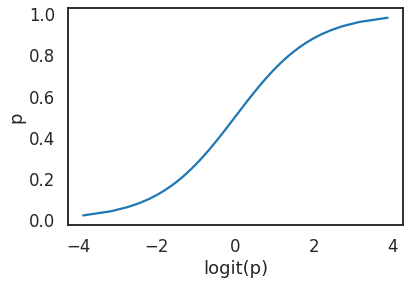

In [ ]:
plt.plot(logit(unit_interval), unit_interval)
plt.xlabel('logit(p)')
plt.ylabel('p');